# Análise de vinhos 🍷

## Sobre o dataset
O dataset é composto por informações sobre características químicas de diferentes tipos de vinho, branco ou tinto.
- Type: indica se o vinho é branco ou tinto;
- Fixed acidity: a quantidade de ácidos não volatéis (g/L);
- Volatile acidity: a quantidade de ácidos volatéis (g/L);
- Citric acid: a quantidade de ácido cítrico (g/L);
- Residual sugar: a quantidade de açúcar residual (g/L);
- Chlorides: a quantidade de cloretos (g/L);
- Free sulfur dioxide: a quantidade de dióxido de enxofre livre (mg/L);
- Total sulfur dioxide: a quantidade total de dióxido de enxofre (mg/L);
- Density: a densidade do vinho (g/cm³);
- pH: o nível de pH do vinho;
- Sulphates: a quantidade de sulfatos (g/L);
- Alcohol: o teor alcoólico do vinho (%vol);
- Quality: a avaliação do vinho (0-10)

# ------------------------------------------------------------------------------

# Análise dos dados contidos no dataset

In [1]:
# importação das bibliotecas principais
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, r2_score, mean_absolute_error as mae, mean_squared_error as mse
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from xgboost.sklearn import XGBRegressor

In [2]:
# importação do dataset a ser utilizado
df = pd.read_csv('../dataset/VinhoClassReg.csv')

In [3]:
# visualização das primeiras linhas para compreender melhor a estrutura do dataset
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
# descobrir informação sobre as colunas que compõem o dataset (quantidade de linhas com valores e tipo de valores)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


### Interpretação dos resultados:
- Existem valores nulos nas colunas 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'pH' e 'sulphates';
- A coluna 'type' está em formato objeto. É necessário proceder à conversão para formato númerico de modo a proceder à análise dos tipos de vinhos com os diferentes atributos e à criação dos modelos de classificação e de regressão.

In [5]:
# contagem dos valores nulos 
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

### Interpretação dos resultados:
- O atributo com maior número de linhas nulas ('fixed acidity') tem somente 10 linhas com valores nulos;
- Podemos resolver o problema das linhas com valores nulos de duas formas distintas:
  - Eliminação das linhas;
  - Substituir os valores nulos pelo valor médio de cada uma das colunas.
- Dado que o dataset é composto por 6497 linhas e o número de linhas com valores nulos nas diferentes colunas ser extremamente reduzido em comparação, vamos proceder à remoção dessas linhas.

In [6]:
# remoção de linhas com valores nulos
df = df.dropna()

In [7]:
# confirmação da remoção de linhas com valores nulos
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Interpretação dos resultados:
- Certificamo-nos que já não existem linhas com valores nulos no dataframe. Agora podemos passar à conversão dos valores da coluna 'type' para valores númericos. Podemos fazer esta conversão de duas formas:
  - Através do método get_dummies();
  - Através do LabelEncoder().
- Uma vez que só existem dois tipos de vinho no nosso dataset - white ou red -, o método de conversão mais eficiente é o LabelEncoder.

In [8]:
# inicialização do LabelEncoder
label_encoder = LabelEncoder()

In [9]:
# conversão dos valores da coluna 'type' em valores númericos
df['type'] = label_encoder.fit_transform(df['type'])

In [10]:
# confirmação da conversão dos valores da coluna 'type' em valores númericos
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6463 non-null   int64  
 1   fixed acidity         6463 non-null   float64
 2   volatile acidity      6463 non-null   float64
 3   citric acid           6463 non-null   float64
 4   residual sugar        6463 non-null   float64
 5   chlorides             6463 non-null   float64
 6   free sulfur dioxide   6463 non-null   float64
 7   total sulfur dioxide  6463 non-null   float64
 8   density               6463 non-null   float64
 9   pH                    6463 non-null   float64
 10  sulphates             6463 non-null   float64
 11  alcohol               6463 non-null   float64
 12  quality               6463 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 706.9 KB


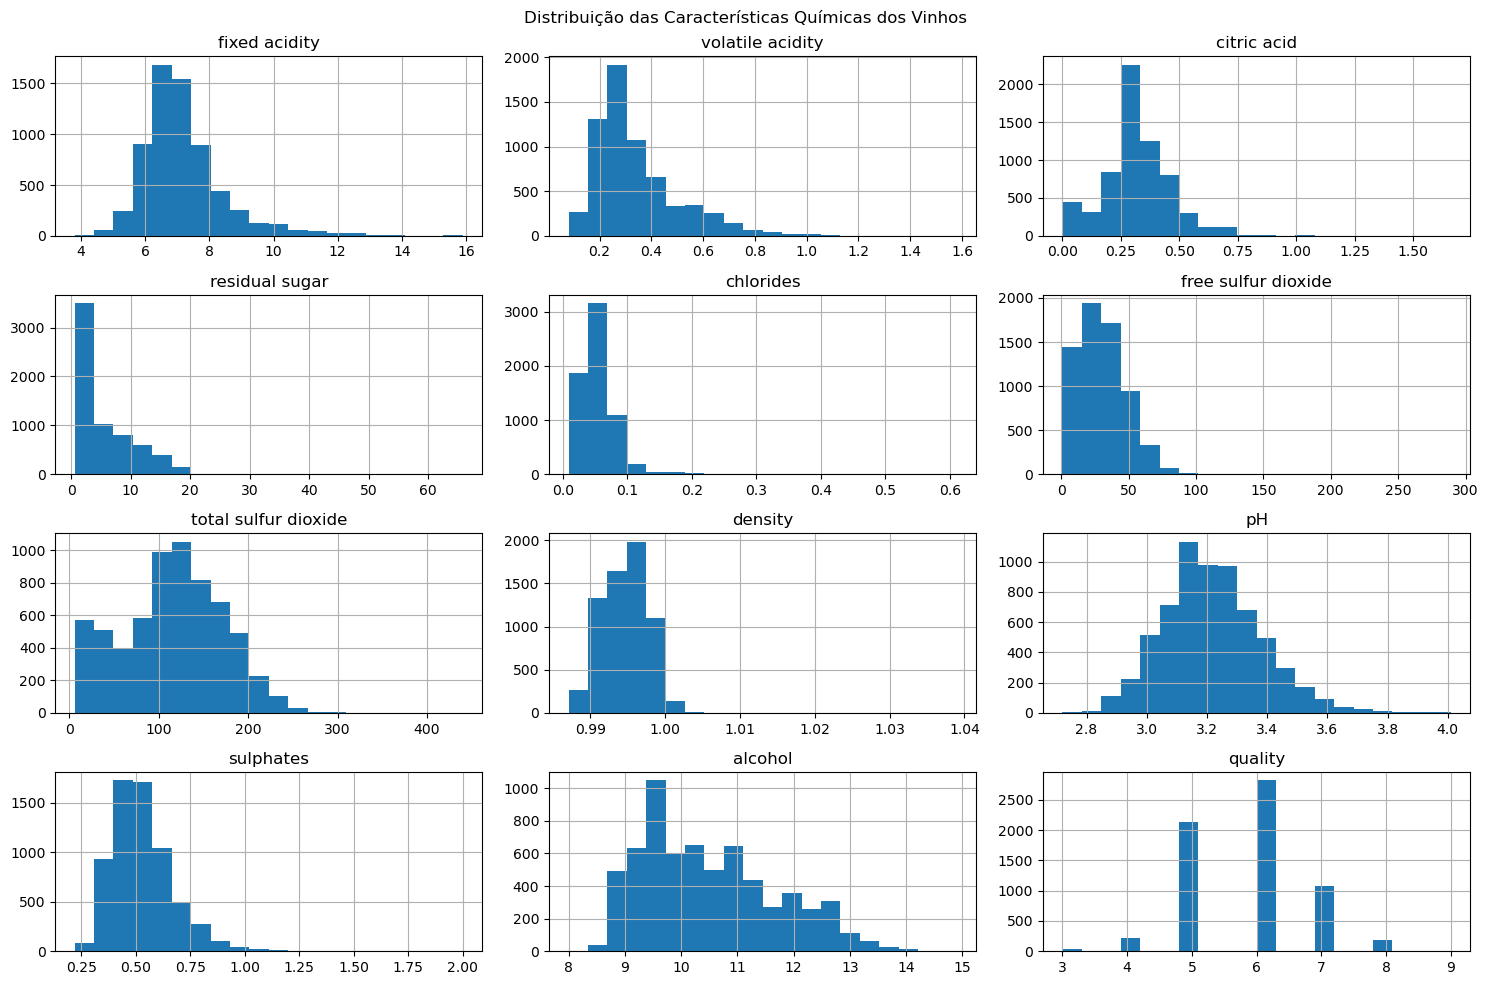

In [7]:
# Distribuição das Características
df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribuição das Características Químicas dos Vinhos')
plt.tight_layout()
plt.show()

In [12]:
# Estatísticas descritivas para vinhos brancos
print("Estatísticas descritivas para vinhos brancos")
print(df[df['type'] == 0].describe())

Estatísticas descritivas para vinhos brancos
         type  fixed acidity  volatile acidity  citric acid  residual sugar  \
count  1593.0    1593.000000       1593.000000  1593.000000     1593.000000   
mean      0.0       8.326365          0.527659     0.271551        2.538512   
std       0.0       1.740681          0.179297     0.194843        1.412061   
min       0.0       4.600000          0.120000     0.000000        0.900000   
25%       0.0       7.100000          0.390000     0.090000        1.900000   
50%       0.0       7.900000          0.520000     0.260000        2.200000   
75%       0.0       9.200000          0.640000     0.420000        2.600000   
max       0.0      15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1593.000000          1593.000000           1593.000000  1593.000000   
mean      0.087497            15.841808             46.463905     0.996752   
std      

In [13]:
# Estatísticas descritivas para vinhos tintos
print("Estatísticas descritivas para vinhos tintos")
print(df[df['type'] == 1].describe())

Estatísticas descritivas para vinhos tintos
         type  fixed acidity  volatile acidity  citric acid  residual sugar  \
count  4870.0    4870.000000       4870.000000  4870.000000     4870.000000   
mean      1.0       6.855123          0.278071     0.334199        6.394343   
std       0.0       0.843444          0.100528     0.120915        5.070853   
min       1.0       3.800000          0.080000     0.000000        0.600000   
25%       1.0       6.300000          0.210000     0.270000        1.700000   
50%       1.0       6.800000          0.260000     0.320000        5.200000   
75%       1.0       7.300000          0.320000     0.390000        9.900000   
max       1.0      14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4870.000000          4870.000000           4870.000000  4870.000000   
mean      0.045771            35.317146            138.340144     0.994026   
std       

### Interpretação dos resultados obtidos:
- existe cerca de o triplo de vinhos tintos do que de vinhos brancos. Deste modo, é possível concluir que o dataset é DESBALANCEADO!!!

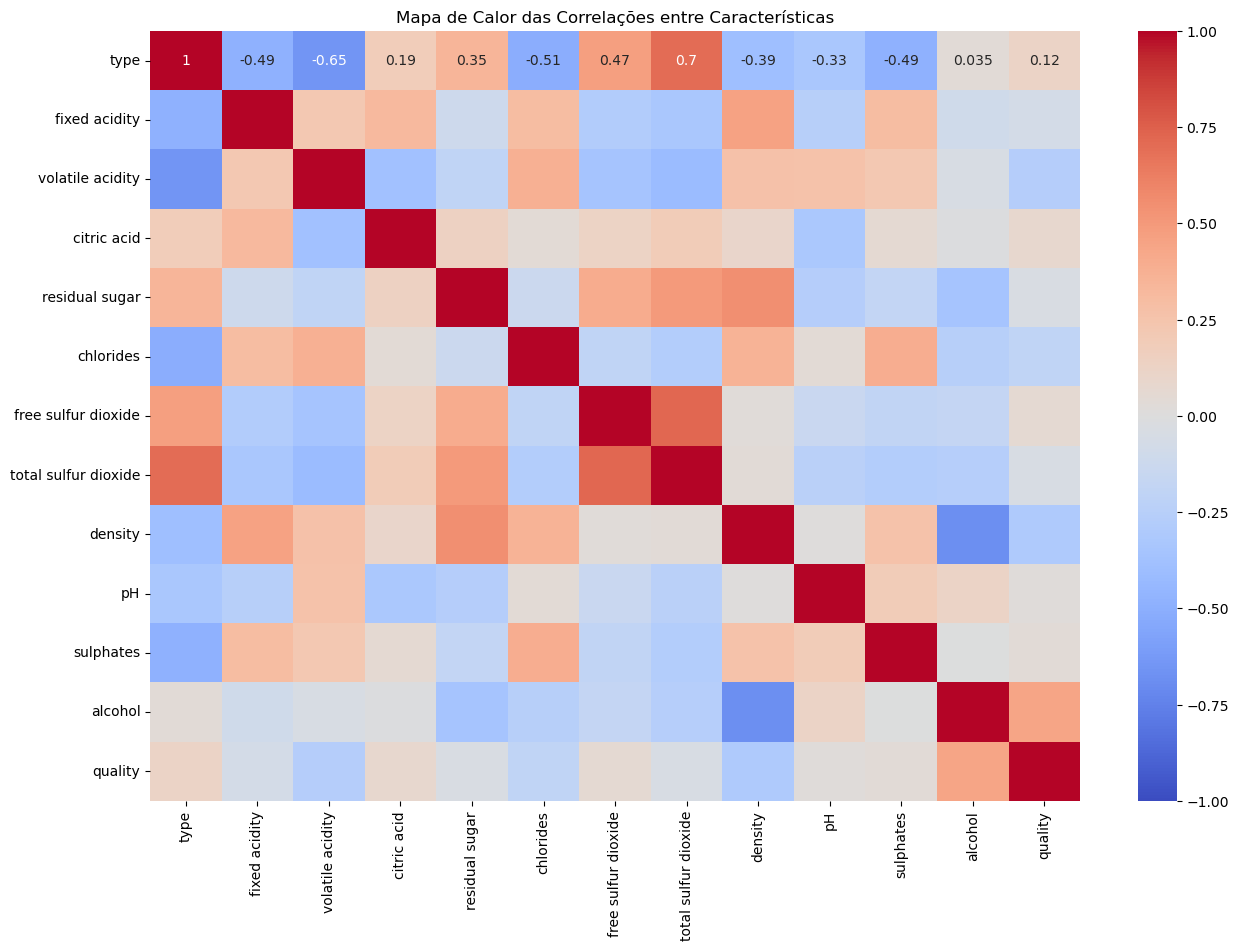

In [14]:
# Análise de Correlação
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de Calor das Correlações entre Características')
plt.show()

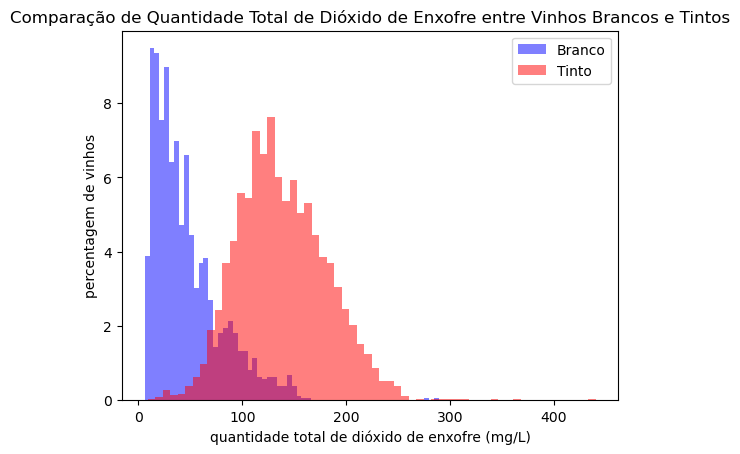

In [15]:
# comparação dos tipos de vinho com a quantidade total de dióxido de enxofre
white = df[df['type'] == 0]
red = df[df['type'] == 1]

white['total sulfur dioxide'].plot.hist(weights = np.ones(len(white['total sulfur dioxide'])) / len(white['total sulfur dioxide']) * 100,
                                        alpha = 0.5,
                                        color = 'blue',
                                        bins = 60,
                                        ylabel = 'percentagem de vinhos',
                                        xlabel = 'quantidade total de dióxido de enxofre (mg/L)')
red['total sulfur dioxide'].plot.hist(weights = np.ones(len(red['total sulfur dioxide'])) / len(red['total sulfur dioxide']) * 100,
                                      alpha = 0.5,
                                      color = 'red',
                                      bins = 60,
                                      ylabel = 'percentagem de vinhos',
                                      xlabel = 'quantidade total de dióxido de enxofre (mg/L)')

plt.title('Comparação de Quantidade Total de Dióxido de Enxofre entre Vinhos Brancos e Tintos')
plt.legend(['Branco', 'Tinto'])
plt.show()

### Interpretação dos resultados obtidos:
- Apesar de haver um intervalo no qual ambos os tipos de vinhos apresentam valores em comum, existe uma percentagem muito maior de vinhos brancos com valores de quantidade total de dióxido de enxofre mais baixos do que de vinhos tintos e vice-versa. Assim, conclui-se que os vinhos tintos geralmente apresentam quantidade total de dióxido de enxofre superior aos vinhos brancos.

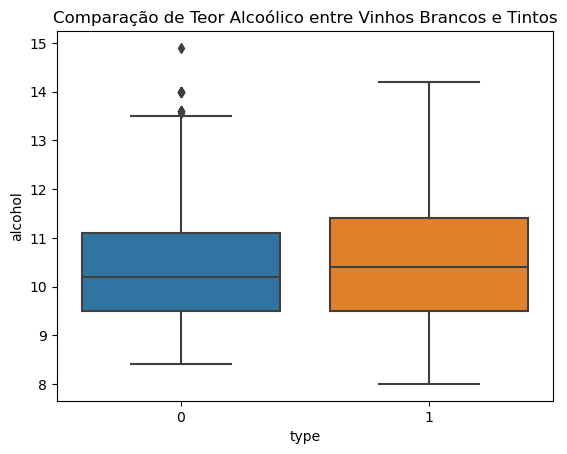

In [16]:
# comparação dos tipos de vinho com o teor alcoólico
sns.boxplot(x='type', y='alcohol', data=df)
plt.title('Comparação de Teor Alcoólico entre Vinhos Brancos e Tintos')
plt.show()

### Interpretação dos resultados obtidos:
- Apesar dos intervalos de teor alcoólico dos dois tipos de vinho compreenderem valores semelhantes, o intervalo de valores dos vinhos tintos é maior. Deste modo, é possível concluir que os vinhos tintos têm um teor alcoólico superior aos vinhos brancos.

/Users/miguelamoreira/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/miguelamoreira/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/miguelamoreira/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/miguelamoreira/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

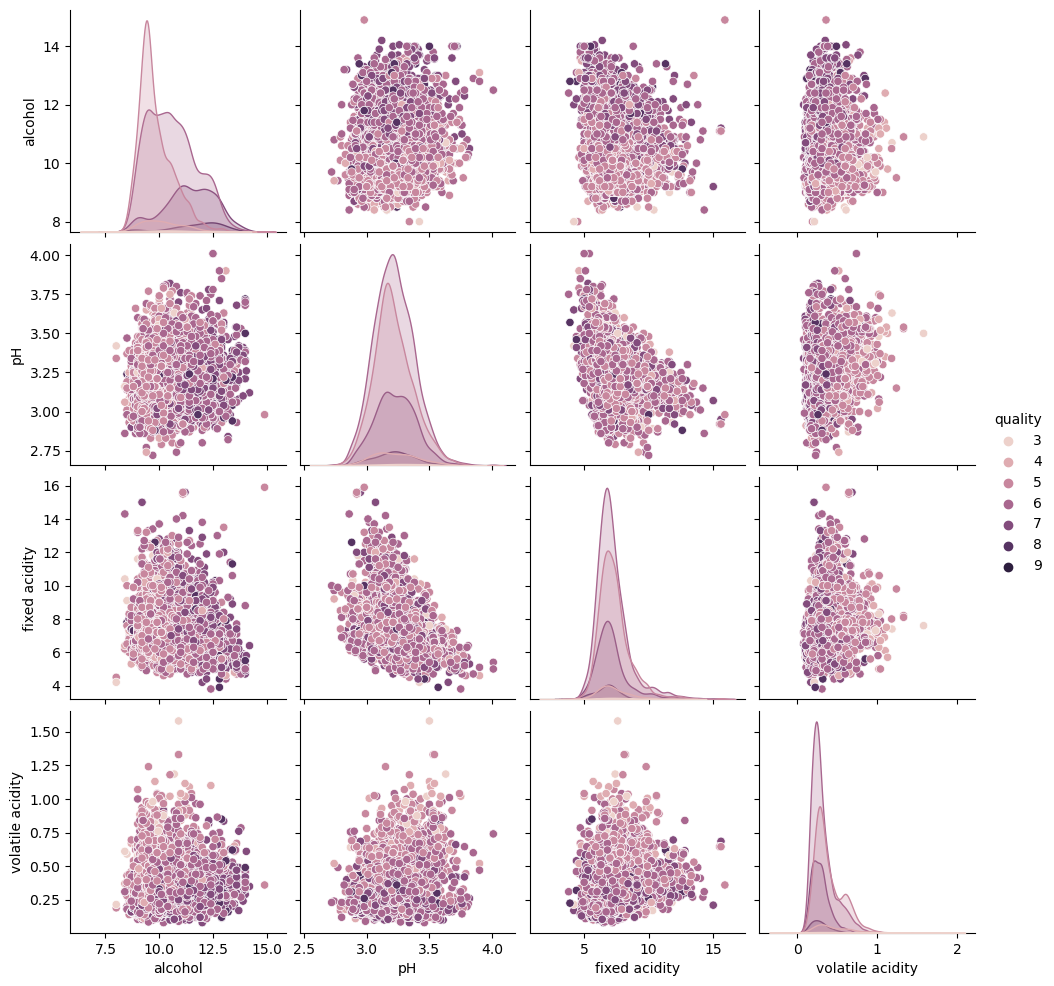

In [17]:
# Relação entre variáveis e qualidade
sns.pairplot(df, vars=['alcohol', 'pH', 'fixed acidity', 'volatile acidity'], hue='quality')
plt.show()

### Interpretação dos resultados obtidos (gráficos nas diagonais):
- Os vinhos de qualidade mais baixa (quality = 3) apresentam um maior teor alcoólico;
- Os vinhos de qualidade mais baixa (quality = 3) são os vinhos com valores de pH mais elevados (<= 4.00);
- Os vinhos de qualidade mais baixa (quality = 3) têm valores mais elevados de quantidade de ácidos não volatéis;
- Os vinhos de qualidade mais baixa (quality = 3) têm valores mais elevados de quantidade de ácidos volatéis.

# Pré-processamento

In [18]:
# Como para os modelos classificação não é relevante o tipo de vinho (coluna type), mas para os modelos de regressão é, vamos fazer uma cópia do df para utilizarmos mais tarde
df2 = df.copy()

## Pré-processamento - Classificação

In [19]:
# definição das variáveis X (atributos) e y (tipo de vinho)
X = df.drop('type', axis=1)
y = df['type']

In [20]:
# divisão dos valores a serem utilizados para teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [21]:
# estandardização dos valores dos atributos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Pré-processamento - Regressão

In [22]:
# definição das variáveis X (atributos) e y (qualidade)
X2 = df.drop('quality', axis=1)
y2 = df['quality']

In [23]:
# divisão dos valores a serem utilizados para teste e treino
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=24)

In [24]:
# estandardização dos valores dos atributos
scaler = StandardScaler()
X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.transform(X2_test)

# Classificação 
- Objetivo: prever o tipo de vinho (type)

## Decision Tree Classifier

In [25]:
# criação do modelo de classificação Decision Trees (DTC)
dtc = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=24)
dtc = dtc.fit(X_train, y_train)

In [26]:
# avaliação inicial do modelo de classificação DTC 
dtc.score(X_test, y_test)

0.9853054911059551

Interpretação do resultado obtido:
- A pontuação obtida pelo modelo de classificação foi bastante elevada (~0.99). Apesar disto, podemos tentar otimizar o modelo para ver se conseguimos obter um resultado melhor.

### Otimização do modelo de classificação DTC

In [27]:
# procurar quais são os melhores parâmetros para poder fazer a otimização
parameters = {
    'max_depth': (4, 6, 9),
    'min_samples_leaf': (1, 8),
    'min_samples_split': (2, 5, 10)
}

grid_search = GridSearchCV(dtc, parameters, n_jobs = -1, verbose = 1, scoring = 'f1')
grid_search.fit(X_train, y_train)

print('Best parameters:')

best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print('\t%s: %r' % (param_name, best_parameters[param_name]))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters:
	max_depth: 9
	min_samples_leaf: 1
	min_samples_split: 5


In [28]:
# otimização a partir dos valores encontrados
dtc2 = tree.DecisionTreeClassifier(criterion='entropy', random_state=24, max_depth=9, min_samples_leaf=1, min_samples_split=2)
dtc2 = dtc2.fit(X_train, y_train)
dtc2.score(X_test, y_test)

0.9860788863109049

Interpretação do resultado obtido:
- O valor obtido na otimização foi ligeiramente mais baixo do que o valor do obtido inicialmente, por isso vamos utilizar a versão anterior do modelo.

In [29]:
# acurácia 
dtc_accuracy = accuracy_score(y_true = y_train, y_pred = dtc.predict(X_train))

# f1 score
dtc_f1 = f1_score(y_true=y_test, y_pred=dtc.predict(X_test), average='weighted')

# precision
dtc_precision = precision_score(y_test, y_pred=dtc.predict(X_test))

# recall
dtc_recall = recall_score(y_test, y_pred=dtc.predict(X_test))


classifiers_results = pd.DataFrame(columns=['Model', 'Accuracy', 'F1', 'Precision', 'Recall'], data=[['Decision Tree', dtc_accuracy, dtc_f1, dtc_precision, dtc_recall]])
classifiers_results

,Model,Accuracy,F1,Precision,Recall
0,Decision Tree,0.992263,0.985296,0.99005,0.991036


## Random Forest Classifier

In [30]:
# Criação do modelo de classificação Random Forest (RFC)
rfc = RandomForestClassifier(random_state = 24)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=24)

In [31]:
# Avaliação inicial do modelo RFC
rfc.score(X_test, y_test)

0.9938128383604021

Interpretação do resultado obtido:
- À semelhança do que já tinha acontecido com o modelo anterior, Decision Tree Classifier, o Random Forest Classifier obteve inicialmente um valor bastante elevado (>0.99), mas vamos proceder a uma otimização para ver se conseguimos melhorar esse valor.

### Otimização do modelo de classificação RFC

In [32]:
rf_params = {'max_depth': [None, 3, 5, 10],
             'max_features': ['sqrt', 'log2', None],
             'n_estimators': [2, 5, 10, 100, 200],
             'min_samples_split': [2, 5, 10]
}

rf_cv_model = GridSearchCV(RandomForestClassifier(random_state = 24), rf_params, cv=10, n_jobs = 1, verbose = 1)
rf_cv_model.fit(X_train, y_train)

print('Best parameters:')
rf_cv_model.best_params_

Fitting 10 folds for each of 180 candidates, totalling 1800 fits
Best parameters:


{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 100}

In [33]:
rfc2 = RandomForestClassifier(
    n_estimators = rf_cv_model.best_params_['n_estimators'],
    max_depth = rf_cv_model.best_params_['max_depth'],
    max_features = rf_cv_model.best_params_['max_features'],
    min_samples_split = rf_cv_model.best_params_['min_samples_split']
)

rfc2.fit(X_train, y_train)
rfc2.score(X_test, y_test)

0.9953596287703016

Interpretação do resultado obtido:
- O resultado obtido após a otimização é melhor do que o resultado obtido inicialmente, por isso vamos escolher este novo modelo.

In [34]:
# acurácia 
rfc_accuracy = accuracy_score(y_true = y_train, y_pred = rfc2.predict(X_train))

# f1 score
rfc_f1 = f1_score(y_true=y_test, y_pred= rfc2.predict(X_test), average='weighted')

# precision
rfc_precision = precision_score(y_test, y_pred= rfc2.predict(X_test))

# recall
rfc_recall = recall_score(y_test, y_pred= rfc2.predict(X_test))

classifiers_results.loc[len(classifiers_results)] = ['Random Forest', rfc_accuracy, rfc_f1, rfc_precision, rfc_recall]
classifiers_results

,Model,Accuracy,F1,Precision,Recall
0,Decision Tree,0.992263,0.985296,0.990050,0.991036
1,Random Forest,0.999807,0.995360,0.997012,0.997012


## SVC

In [35]:
# Criação do modelo de classificação Scalable Vector Classifier (SVC)
svc = SVC()
svc = svc.fit(X_train, y_train)

In [36]:
# Avaliação inicial do modelo SVC
svc.score(X_test, y_test)

0.9969064191802011

### Otimização do modelo de classificação SVC

In [37]:
svc_params = {
    'C': [0.1, 1, 10, 100],  
    'gamma': [1, 0.1, 0.01, 0.001], 
    'kernel': ['rbf', 'linear', 'poly'] 
}

svc_cv_model = GridSearchCV(estimator=svc, param_grid=svc_params, cv=10, n_jobs=1, verbose=1)
svc_cv_model.fit(X_train, y_train)

print('Best parameters:')
print(svc_cv_model.best_params_)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
Best parameters:
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [38]:
svc2 = SVC(
    C=svc_cv_model.best_params_['C'],
    gamma=svc_cv_model.best_params_['gamma'],
    kernel=svc_cv_model.best_params_['kernel']
)

svc2.fit(X_train, y_train)

SVC(C=10, gamma=0.1)

In [39]:
# Avaliação final do modelo SVC
svc2.score(X_test, y_test)

0.9961330239752514

In [40]:
# acurácia 
svc_accuracy = accuracy_score(y_true = y_train, y_pred = svc2.predict(X_train))

# f1 score
svc_f1 = f1_score(y_true=y_test, y_pred= svc2.predict(X_test), average='weighted')

# precision
svc_precision = precision_score(y_test, y_pred= svc2.predict(X_test))

# recall
svc_recall = recall_score(y_test, y_pred= svc2.predict(X_test))

classifiers_results.loc[len(classifiers_results)] = ['SVC', rfc_accuracy, rfc_f1, rfc_precision, rfc_recall]
classifiers_results

,Model,Accuracy,F1,Precision,Recall
0,Decision Tree,0.992263,0.985296,0.990050,0.991036
1,Random Forest,0.999807,0.995360,0.997012,0.997012
2,SVC,0.999807,0.995360,0.997012,0.997012


# Modelos de Regressão
- Objetivo: prever a qualidade do vinho (quality)

## Linear Regression (LR)

In [41]:
# Criação do modelo de regressão Linear Regression (LR)
lr = LinearRegression()
lr.fit(X2_train, y2_train)

LinearRegression()

In [42]:
# Avaliação inicial do modelo LR
lr.score(X2_test, y2_test)

0.297515559272843

In [43]:
# Previsão do modelo LR
lr_pred = lr.predict(X2_test)

In [44]:
# R2
lr_r2 = r2_score(y2_test, lr_pred)

# MAE
lr_mae = mae(y2_test, lr_pred)

# MSE
lr_mse = mse(y2_test, lr_pred)

# RMSE
lr_rmse = np.sqrt(mse(y2_test, lr_pred))

regressors_results = pd.DataFrame(columns=['Model', 'R2', 'MAE', 'MSE', 'RMSE'], data=[['Linear Regression', lr_r2, lr_mae, lr_mse, lr_rmse]])
regressors_results

,Model,R2,MAE,MSE,RMSE
0,Linear Regression,0.297516,0.572577,0.534233,0.730912


## Random Forest Regressor

In [45]:
# Criação do modelo de regressão Random Forest Regressor (RFR)
rfr = RandomForestRegressor(random_state=24)
rfr.fit(X2_train, y2_train)

RandomForestRegressor(random_state=24)

In [46]:
# Avaliação inicial do RFR
rfr.score(X2_test, y2_test)

0.5197086288938562

In [47]:
# Previsão do modelo RFR
rfr_pred = rfr.predict(X2_test)

In [48]:
# R2
rfr_r2 = r2_score(y2_test, rfr_pred)

# MAE
rfr_mae = mae(y2_test, rfr_pred)

# MSE
rfr_mse = mse(y2_test, rfr_pred)

# RMSE
rfr_rmse = np.sqrt(mse(y2_test, rfr_pred))

regressors_results.loc[len(regressors_results)] = ['Random Forest', rfr_r2, rfr_mae, rfr_mse, rfr_rmse]
regressors_results

,Model,R2,MAE,MSE,RMSE
0,Linear Regression,0.297516,0.572577,0.534233,0.730912
1,Random Forest,0.519709,0.425661,0.365257,0.604365


### Otimização do modelo RFR

In [49]:
rfr_params = {'max_depth': [None, 3, 5, 10],
             'max_features': ['sqrt', 'log2', None],
             'n_estimators': [2, 5, 10, 100, 200],
             'min_samples_split': [2, 5, 10]
}

rfr_cv_model = GridSearchCV(RandomForestRegressor(random_state = 24), rf_params, cv=10, n_jobs = 1, verbose = 1)
rfr_cv_model.fit(X_train, y_train)

print('Best parameters:')
rfr_cv_model.best_params_

Fitting 10 folds for each of 180 candidates, totalling 1800 fits
Best parameters:


{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 200}

In [50]:
rfr2 = RandomForestRegressor(
    n_estimators = rfr_cv_model.best_params_['n_estimators'],
    max_depth = rfr_cv_model.best_params_['max_depth'],
    max_features = rfr_cv_model.best_params_['max_features'],
    min_samples_split = rfr_cv_model.best_params_['min_samples_split']
)
rfr2.fit(X_train, y_train)

rfr2.score(X_test, y_test)

0.9675099131641686

In [51]:
# Previsão do modelo RFR otimizado
rfr2_pred = rfr2.predict(X2_test)

In [52]:
# R2
rfr2_r2 = r2_score(y2_test, rfr2_pred)

# MAE
rfr2_mae = mae(y2_test, rfr2_pred)

# MSE
rfr2_mse = mse(y2_test, rfr2_pred)

# RMSE
rfr2_rmse = np.sqrt(mse(y2_test, rfr2_pred))

regressors_results.loc[len(regressors_results)] = ['Random Forest Otimizado', rfr2_r2, rfr2_mae, rfr2_mse, rfr2_rmse]
regressors_results

,Model,R2,MAE,MSE,RMSE
0,Linear Regression,0.297516,0.572577,0.534233,0.730912
1,Random Forest,0.519709,0.425661,0.365257,0.604365
2,Random Forest Otimizado,-32.622168,4.983814,25.569354,5.056615


## XGBoost

In [53]:
# Criação e treino do modelo XGBoost (XGB)
xgb = XGBRegressor()
xgb.fit(X2_train, y2_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [54]:
# Avaliação inicial do XGB
xgb.score(X2_test, y2_test)

0.48118568747921875

In [55]:
# Previsão 
xgb_pred = xgb.predict(X2_test)

In [56]:
# R2
xgb_r2 = r2_score(y2_test, xgb_pred)

# MAE
xgb_mae = mae(y2_test, xgb_pred)

# MSE
xgb_mse = mse(y2_test, xgb_pred)

# RMSE
xgb_rmse = np.sqrt(mse(y2_test, xgb_pred))

regressors_results.loc[len(regressors_results)] = ['XGBoost', xgb_r2, xgb_mae, xgb_mse, xgb_rmse]
regressors_results

,Model,R2,MAE,MSE,RMSE
0,Linear Regression,0.297516,0.572577,0.534233,0.730912
1,Random Forest,0.519709,0.425661,0.365257,0.604365
2,Random Forest Otimizado,-32.622168,4.983814,25.569354,5.056615
3,XGBoost,0.481186,0.447732,0.394554,0.628135


In [57]:
xgb_params = {
    'booster': ['gbtree', 'gblinear'],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 500],
    'objective': ['reg:squarederror']
}

xgb_cv_model = GridSearchCV(XGBRegressor(random_state=24), xgb_params, cv=10, n_jobs=-1, verbose=1) 
xgb_cv_model.fit(X2_train, y2_train)

print('Best parameters:')
xgb_cv_model.best_params_

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best parameters:


{'booster': 'gbtree',
 'learning_rate': 0.1,
 'n_estimators': 500,
 'objective': 'reg:squarederror'}

In [58]:
xgb2 = XGBRegressor(
    booster = xgb_cv_model.best_params_['booster'],
    learning_rate = xgb_cv_model.best_params_['learning_rate'],
    n_estimators = xgb_cv_model.best_params_['n_estimators'],
    objective = xgb_cv_model.best_params_['objective']
)
xgb2.fit(X2_train, y2_train)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [59]:
# Previsão após otimização
xgb2_pred = xgb2.predict(X2_test)

In [60]:
# R2
xgb2_r2 = r2_score(y2_test, xgb2_pred)

# MAE
xgb2_mae = mae(y2_test, xgb2_pred)

# MSE
xgb2_mse = mse(y2_test, xgb2_pred)

# RMSE
xgb2_rmse = np.sqrt(mse(y2_test, xgb2_pred))

regressors_results.loc[len(regressors_results)] = ['XGBoost Otimizado', xgb2_r2, xgb2_mae, xgb2_mse, xgb2_rmse]
regressors_results

,Model,R2,MAE,MSE,RMSE
0,Linear Regression,0.297516,0.572577,0.534233,0.730912
1,Random Forest,0.519709,0.425661,0.365257,0.604365
2,Random Forest Otimizado,-32.622168,4.983814,25.569354,5.056615
3,XGBoost,0.481186,0.447732,0.394554,0.628135
4,XGBoost Otimizado,0.513860,0.420871,0.369705,0.608034
